In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector
import geopandas as gpd

In [2]:
db = mysql.connector.connect(
    host="localhost",
    user="ramsus",
    passwd="",
    database="superstore"
)

In [3]:
states = pd.read_sql_query("SELECT State, AVG(Delivery_Time) AS Delivery_Time FROM orders GROUP BY State ORDER BY Delivery_Time DESC", db)

/tmp/ipykernel_153910/347257981.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  states = pd.read_sql_query("SELECT State, AVG(Delivery_Time) AS Delivery_Time FROM orders GROUP BY State ORDER BY Delivery_Time DESC", db)


/tmp/ipykernel_153910/2158425748.py:36: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(sm)


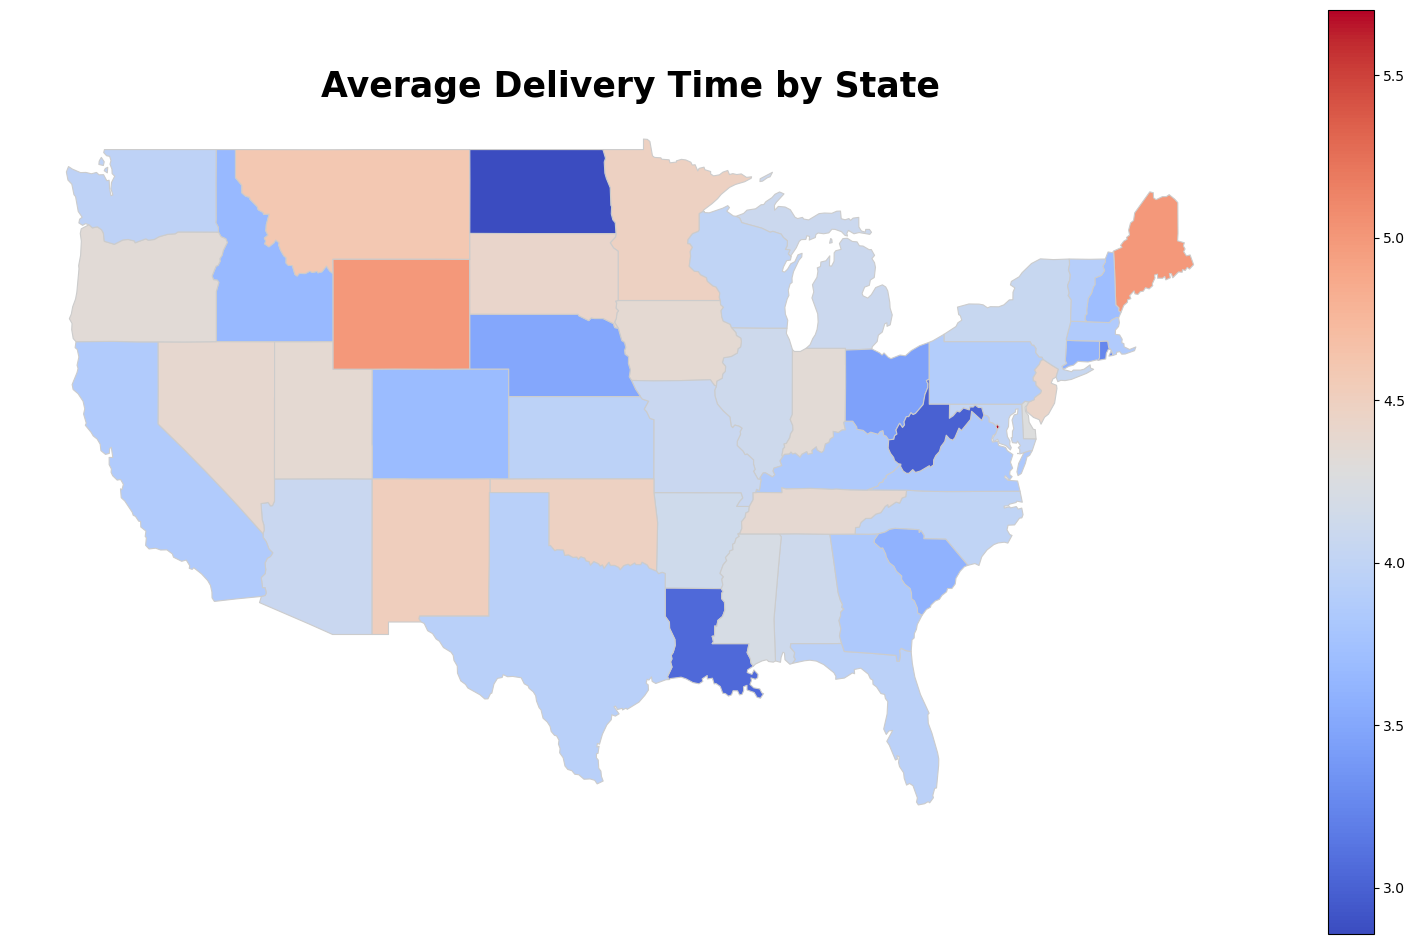

In [20]:
# create a map of states with geopandas without states_map.shp
states_map = gpd.read_file(
    'https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json'
)

# merge the dataframes
states_map = states_map.merge(states,
                              how='left',
                              left_on='name',
                              right_on='State')

# plot the map
fig, ax = plt.subplots(1, figsize=(20, 12))
ax.axis('off')
ax.set_title('Average Delivery Time by State',
             fontdict={
                 'fontsize': '25',
                 'fontweight': 'bold'
             })

# create colorbar as a legend
vmin, vmax = states['Delivery_Time'].min(), states['Delivery_Time'].max()
cmap = 'coolwarm'  # choose a different colormap for clearer differences

# create map with updated color scale
states_map.plot(column='Delivery_Time',
                cmap=cmap,
                linewidth=0.8,
                ax=ax,
                edgecolor='0.8',
                vmin=vmin,
                vmax=vmax)

# create colorbar legend
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
cbar = fig.colorbar(sm)

# save fig as svg file
plt.savefig('delivery_time.svg', dpi=300)